# Telco Churn Analysis

### Import necessary libraries & load data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [53]:
file = Path("__file__").parent / "telco-customer-churn.csv"
df = pd.read_csv(file)

plt.style.use('seaborn-v0_8-talk')

## Initial Data Exploration

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### High-level overview of the data

<BarContainer object of 2 artists>

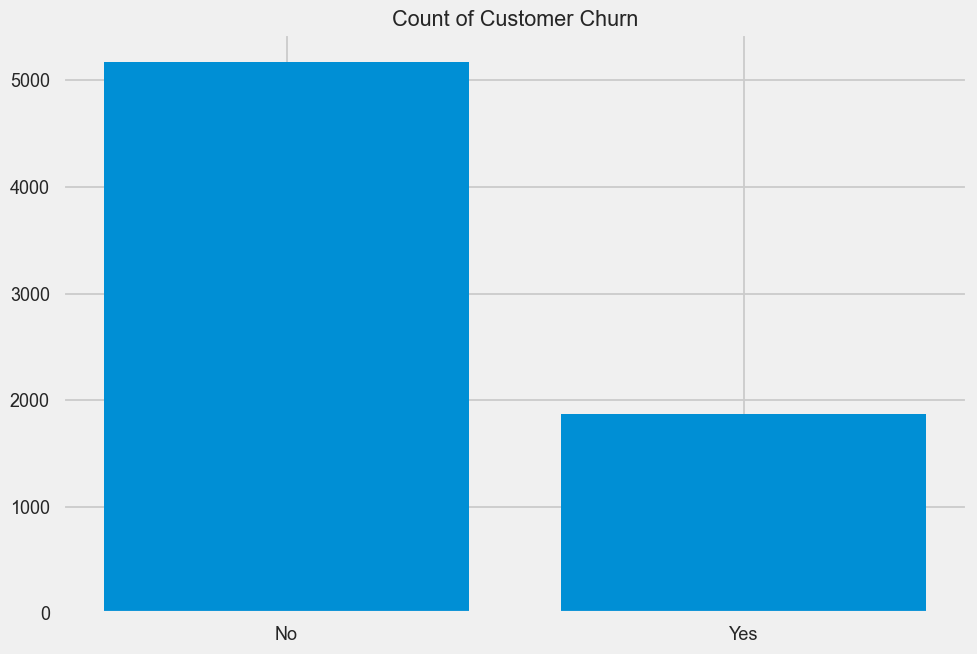

In [56]:
churn = df['Churn'].value_counts()
plt.title('Count of Customer Churn')
plt.bar(churn.index, churn.values)

([<matplotlib.patches.Wedge at 0x172479bd0>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.5%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.5%')])

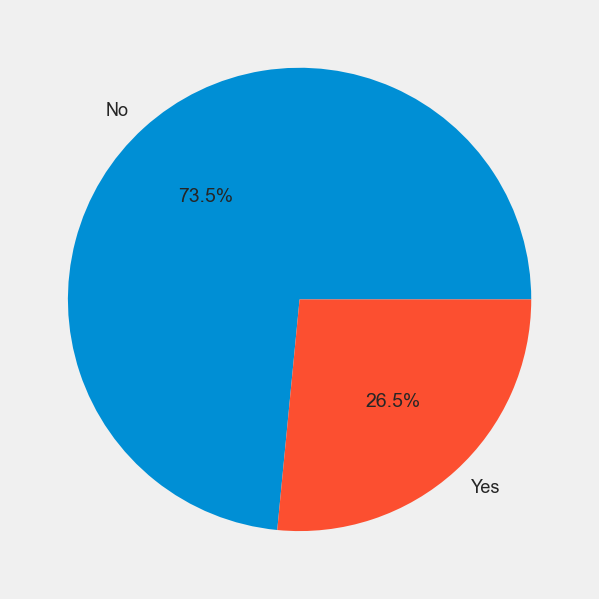

In [57]:
pct_churn = df['Churn'].value_counts(normalize=True)
plt.pie(pct_churn, labels=pct_churn.index, autopct='%1.1f%%')

### Understanding the data that causes churn

#### Numeric Features

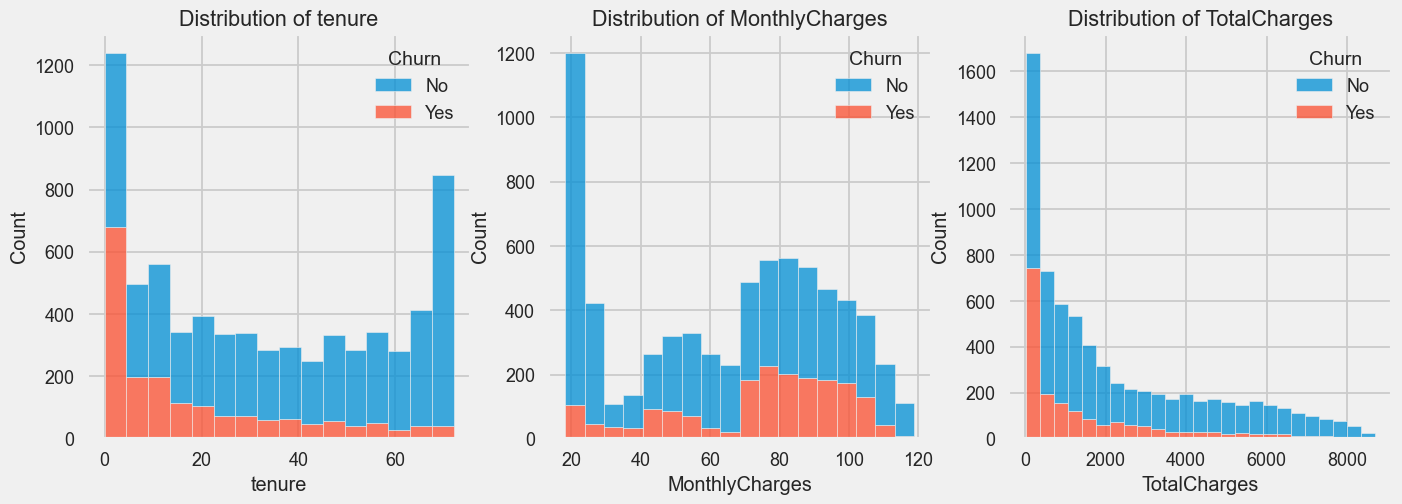

In [ ]:
#| column: body-outset-left
#| out-width: 100%
#| fig-align: center
#| width: 100%
#| fig-caption: Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
for i, feature in enumerate(numerical_features):
    if feature == 'TotalCharges':
        df[feature] = pd.to_numeric(df[feature], errors='coerce')  # Convert to numeric
    sns.histplot(data=df, x=feature, hue='Churn', multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

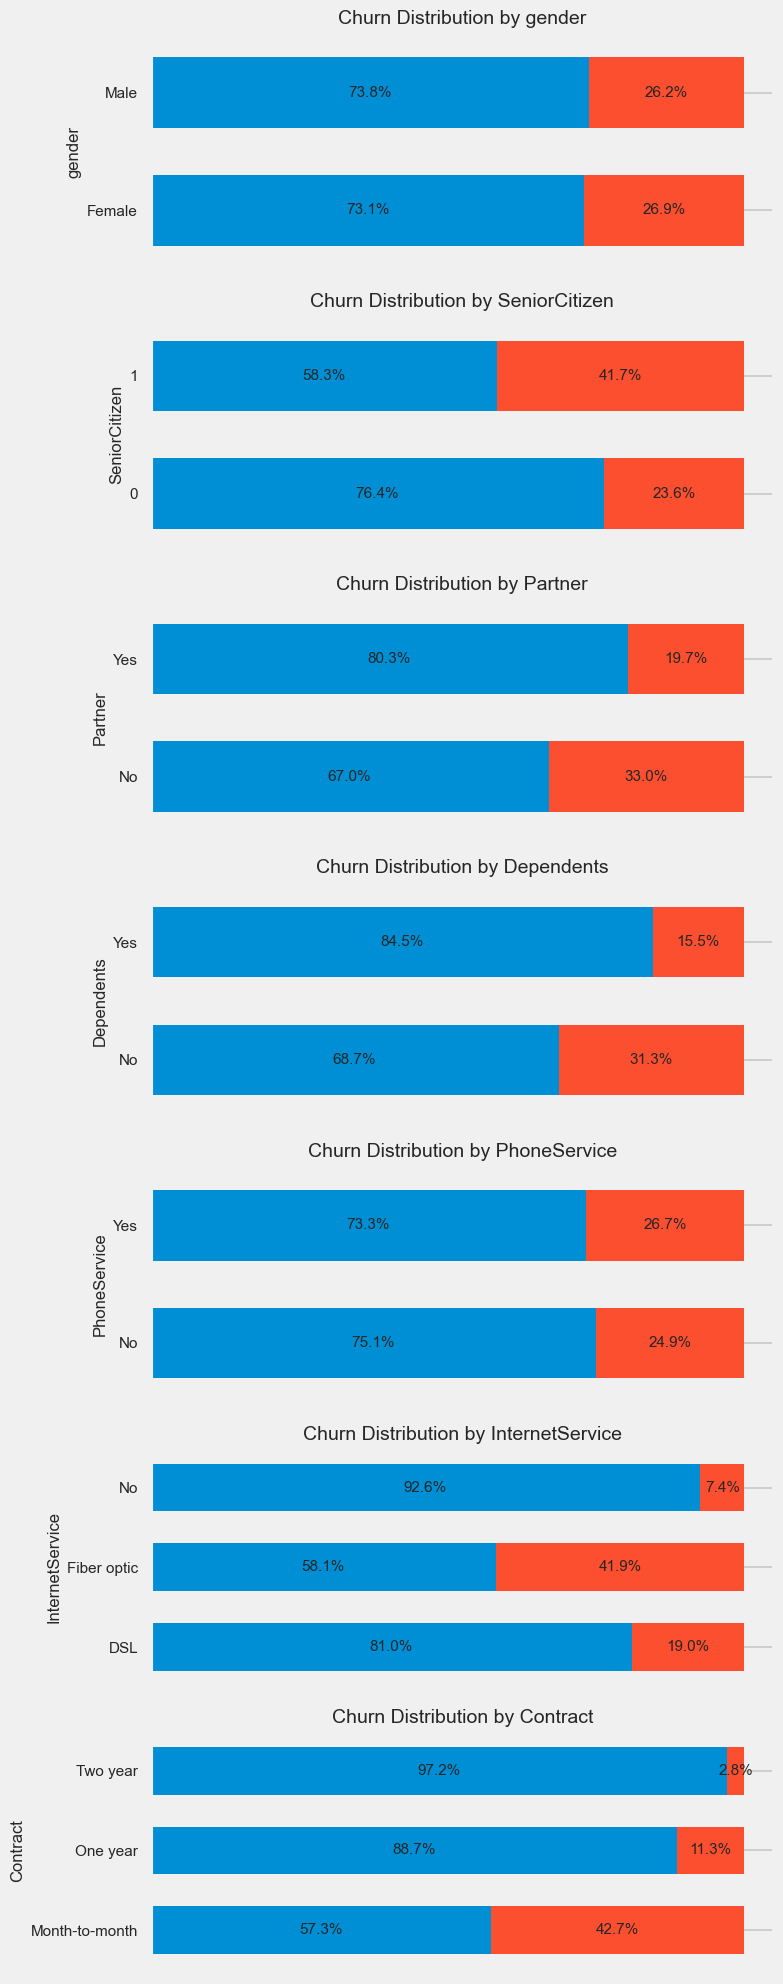

In [103]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract']
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
axes = axes.flatten()

plt.rcParams.update({'font.size': 12})  # Increase base font size

for i, feature in enumerate(categorical_features):
    # Calculate percentages
    percentages = (df.groupby(feature)['Churn']
                    .value_counts(normalize=True)
                    .unstack()
                    .mul(100))
    
    # Create horizontal stacked bars
    percentages.plot(kind='barh', 
                    stacked=True,
                    ax=axes[i],
                    legend=False,
                    width=0.6)  # Changed from height to width
    
    # Customize the plot
    axes[i].set_title(f'Churn Distribution by {feature}', fontsize=14, pad=-30)
    axes[i].set_ylabel(feature, fontsize=12)
    
    # Add percentage labels on the bars
    for c in axes[i].containers:
        axes[i].bar_label(c, fmt='%.1f%%', label_type='center', fontsize=11)
    
    # Remove x-axis percentage labels
    axes[i].set_xticks([])
    
    # Add border around the subplot
    for spine in axes[i].spines.values():
        spine.set_visible(True)
    
    # Make tick labels larger
    axes[i].tick_params(axis='both', which='major', labelsize=11)
    
    # Adjust plot to reduce white space
    axes[i].margins(y=0.15)  # Reduce vertical margins

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Some more detailed analysis

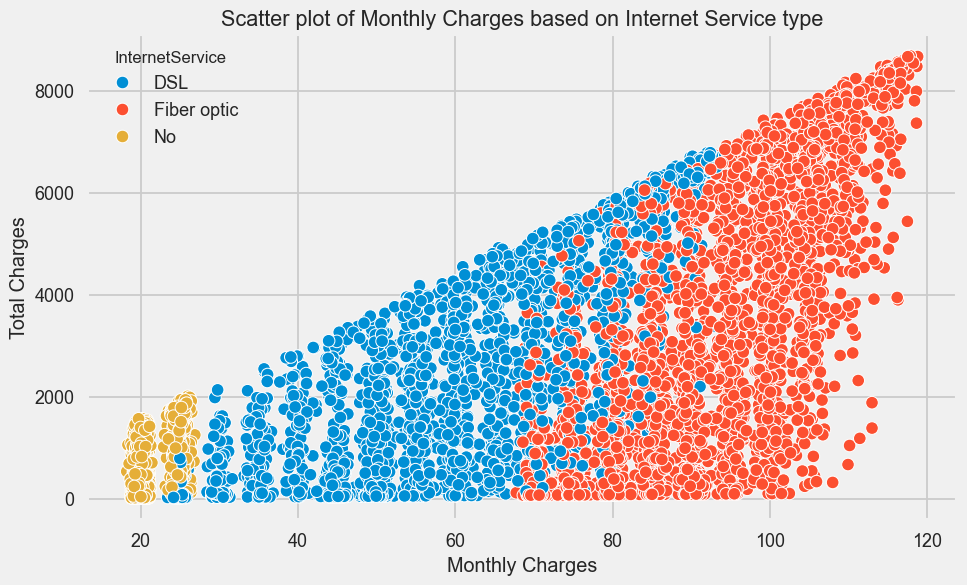

In [79]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='InternetService')
plt.title('Scatter plot of Monthly Charges based on Internet Service type')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

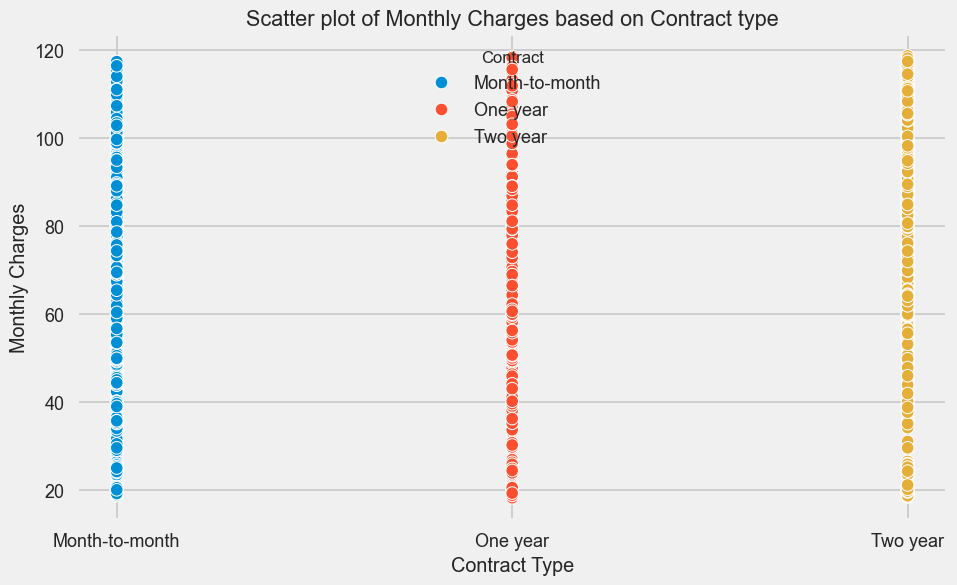

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Contract', y='MonthlyCharges', hue='Contract')
plt.title('Scatter plot of Monthly Charges based on Contract type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

In [100]:
def plot_churn_by_tenure(data, contract_type):
    # Create the bins
    bins = np.arange(0, data['tenure'].max() + 2, 2)  # +2 to include the last value
    data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
    
    # Calculate percentage of churned customers in each bin
    churn_by_tenure = (data.groupby('tenure_bin')['Churn']
                          .value_counts(normalize=True)
                          .unstack())
    
    plt.figure(figsize=(12, 8))
    churn_by_tenure['Yes'].multiply(100).plot(kind='bar')
    plt.title(f'Percentage of Churned Customers by Tenure Length\n{contract_type} Contracts')
    plt.xlabel('Tenure (months)')
    plt.ylabel('Churn Percentage')
    plt.axhline(y=50, color='r', linestyle='--', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    # print(f"\nChurn percentage by tenure bins for {contract_type} contracts:")
    # print(churn_by_tenure['Yes'].multiply(100).round(1))

# Create three dataframes
monthly = df[df['Contract'] == 'Month-to-month']
one_year = df[df['Contract'] == 'One year']
two_year = df[df['Contract'] == 'Two year']

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8200/3961977829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8200/3961977829.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = (data.groupby('tenure_bin')['Churn']


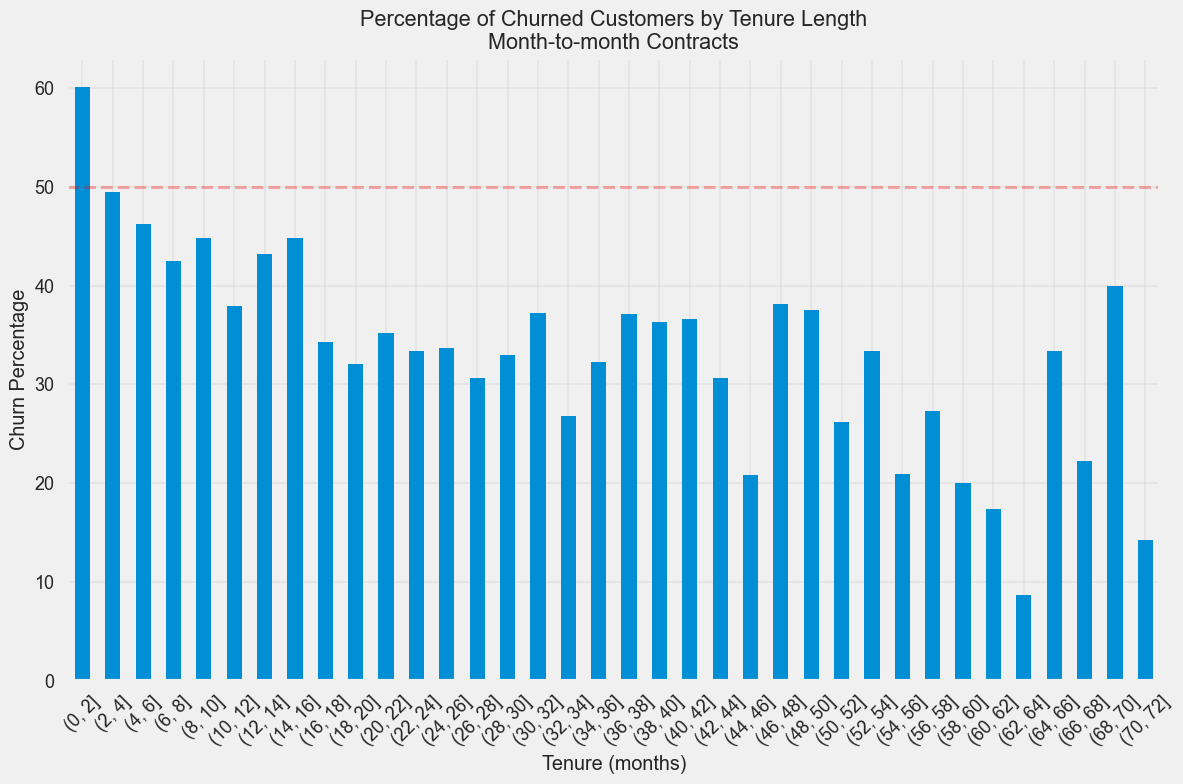


Churn percentage by tenure bins for Month-to-month contracts:
tenure_bin
(0, 2]      60.1
(2, 4]      49.4
(4, 6]      46.2
(6, 8]      42.5
(8, 10]     44.8
(10, 12]    38.0
(12, 14]    43.2
(14, 16]    44.8
(16, 18]    34.3
(18, 20]    32.1
(20, 22]    35.2
(22, 24]    33.3
(24, 26]    33.7
(26, 28]    30.7
(28, 30]    33.0
(30, 32]    37.2
(32, 34]    26.8
(34, 36]    32.3
(36, 38]    37.1
(38, 40]    36.4
(40, 42]    36.7
(42, 44]    30.6
(44, 46]    20.8
(46, 48]    38.1
(48, 50]    37.5
(50, 52]    26.2
(52, 54]    33.3
(54, 56]    20.9
(56, 58]    27.3
(58, 60]    20.0
(60, 62]    17.4
(62, 64]     8.7
(64, 66]    33.3
(66, 68]    22.2
(68, 70]    40.0
(70, 72]    14.3
Name: Yes, dtype: float64


In [99]:
plot_churn_by_tenure(monthly, 'Month-to-month')

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8200/642956251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8200/642956251.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = (data.groupby('tenure_bin')['Churn']


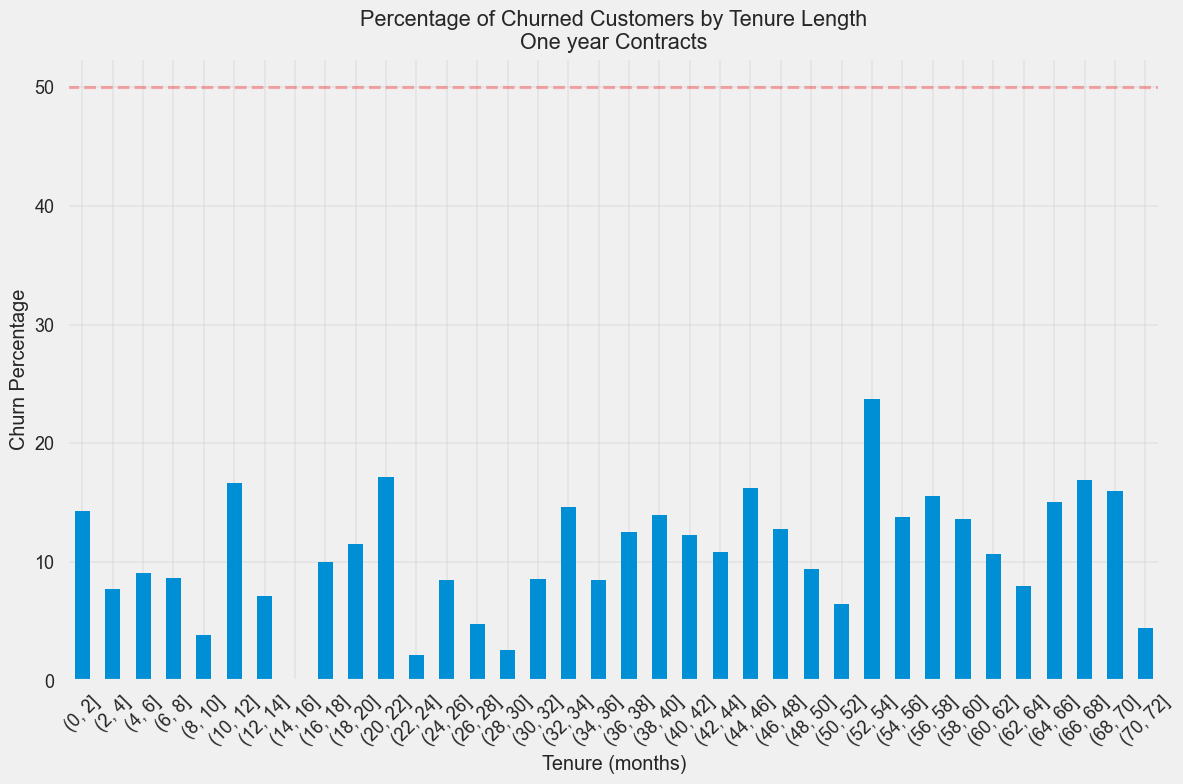

In [101]:
plot_churn_by_tenure(one_year, 'One year')

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8200/642956251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8200/642956251.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = (data.groupby('tenure_bin')['Churn']


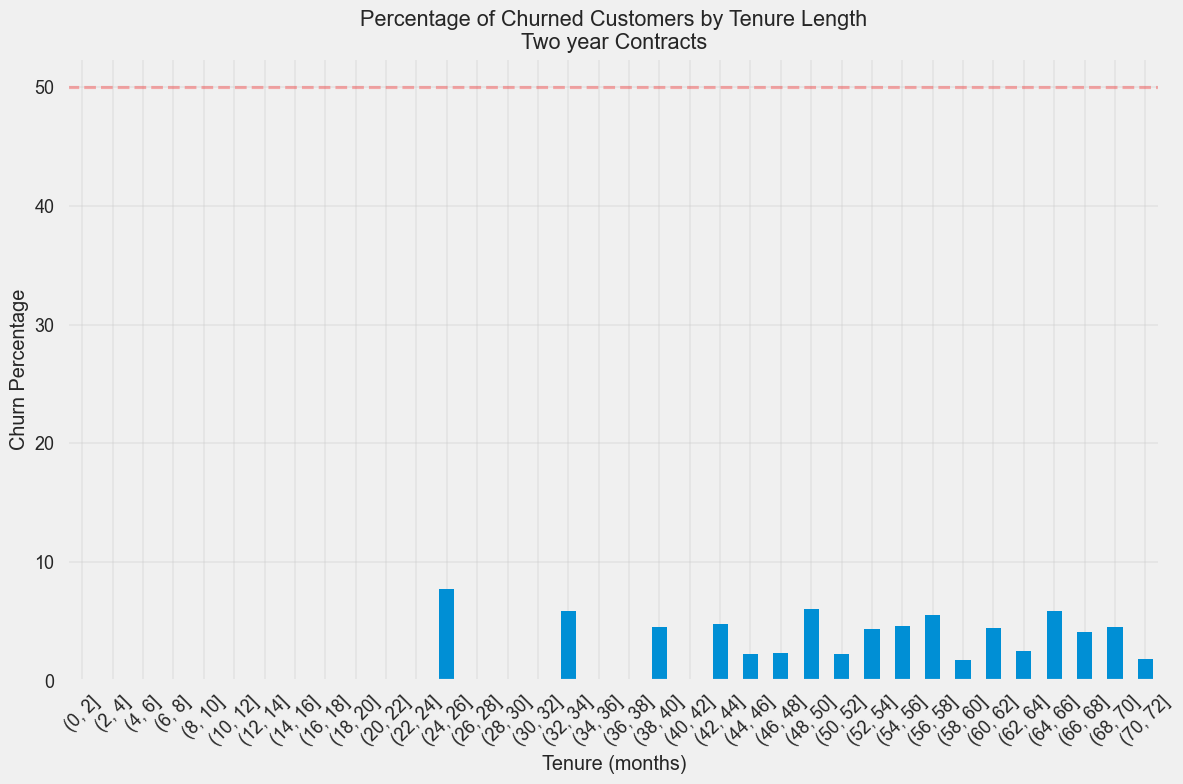

In [102]:
plot_churn_by_tenure(two_year, 'Two year')  